In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as const

from cluster_functions import temp_from_luminosity
from load_mcxc_data import load_clusters
import iqbal_agn_heating_functions as iq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def gaspari_temp(L500):
    exp = (np.log10(L500/(1e44*u.erg/u.s)) + 2.34)/4.71
    temp = np.power(10, exp) * u.keV
    return temp.to(u.GeV)

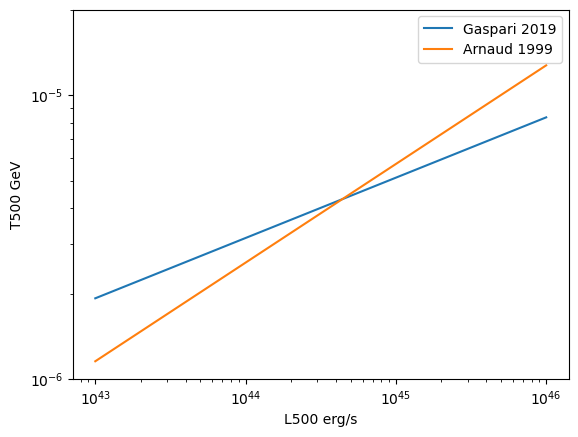

In [3]:
L500s = np.logspace(-1, 2)*1e44*u.erg/u.s
plt.loglog(L500s, gaspari_temp(L500s), label="Gaspari 2019")
plt.loglog(L500s, temp_from_luminosity(L500s), label="Arnaud 1999")

plt.xlabel("L500 erg/s")
plt.ylabel("T500 GeV")

plt.ylim(1e-6, 2e-5)
plt.legend()

In [11]:
clusters = load_clusters()

/Users/eleanorstuart/Desktop/krisp/thermo-idm/load_mcxc_data.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mcxccls=pd.read_csv('data/mcxc|.txt', header=3, sep='|', skiprows=[4],on_bad_lines='warn', skipfooter=skipfooter)


In [26]:
gaspari = []
iqbal = []
for cls in clusters:
    print(gaspari_temp(cls.measurements.L500), iq.T_g([cls.measurements.R500.to(u.Mpc).value], cls.measurements)[0])
    gaspari.append(gaspari_temp(cls.measurements.L500).value)
    iqbal.append(iq.T_g([cls.measurements.R500.to(u.Mpc).value], cls.measurements)[0].value)

4.6095565974554664e-06 GeV 6.888032844103993e-06 GeV
2.6393962628971064e-06 GeV 2.431275396863037e-06 GeV
3.0303371719358535e-06 GeV 3.1487790253134897e-06 GeV
3.5603962322715826e-06 GeV 4.274051109577282e-06 GeV
3.194645243816784e-06 GeV 3.498421903291159e-06 GeV
3.283801380899439e-06 GeV 3.671608704197631e-06 GeV
3.914229308204952e-06 GeV 5.090982608357959e-06 GeV
5.30313302531266e-06 GeV 8.903857395531044e-06 GeV
2.4748602795113142e-06 GeV 2.145066305540772e-06 GeV
2.903530633138288e-06 GeV 2.899649300350132e-06 GeV
3.927433483709805e-06 GeV 5.137996486694284e-06 GeV
2.7034238092451382e-06 GeV 2.5455568974120198e-06 GeV
3.6984594474542644e-06 GeV 4.577203203569921e-06 GeV
3.373956415649466e-06 GeV 3.857254358029487e-06 GeV
3.2935547083702514e-06 GeV 3.6991670464574026e-06 GeV
1.799711908020018e-06 GeV 1.1712976091070944e-06 GeV
4.436536276601477e-06 GeV 6.56625206786079e-06 GeV
3.886500677010408e-06 GeV 5.059288683925985e-06 GeV
4.731718316133779e-06 GeV 7.173920790486451e-06 GeV
3.

1.94618482007234e-06 GeV 1.3638826788819748e-06 GeV
4.765831858644334e-06 GeV 7.315304416886187e-06 GeV
2.386979547062213e-06 GeV 2.005628882882322e-06 GeV
4.155368382352638e-06 GeV 5.680646407013062e-06 GeV
3.077771342705681e-06 GeV 3.2484159938246226e-06 GeV
3.4991457179656152e-06 GeV 4.173554852286055e-06 GeV
4.001999403429899e-06 GeV 5.395759596556433e-06 GeV
2.9909305509935537e-06 GeV 3.0891661714237704e-06 GeV
3.6850062706383956e-06 GeV 4.584013582020113e-06 GeV
2.3211436642542315e-06 GeV 1.9021366445981316e-06 GeV
2.9671054390121933e-06 GeV 3.0423563034779386e-06 GeV
3.2276280980045074e-06 GeV 3.5392291940225075e-06 GeV
3.343472597795596e-06 GeV 3.823555389068698e-06 GeV
3.7822252319254607e-06 GeV 4.790326119118916e-06 GeV
1.198862805473045e-06 GeV 5.389782584415778e-07 GeV
2.46664401469649e-06 GeV 2.135146568981179e-06 GeV
2.9827859845636894e-06 GeV 3.0617172462447416e-06 GeV
2.34470095508037e-06 GeV 1.9365878931997234e-06 GeV
2.1801362935947306e-06 GeV 1.68854211817921e-06 GeV

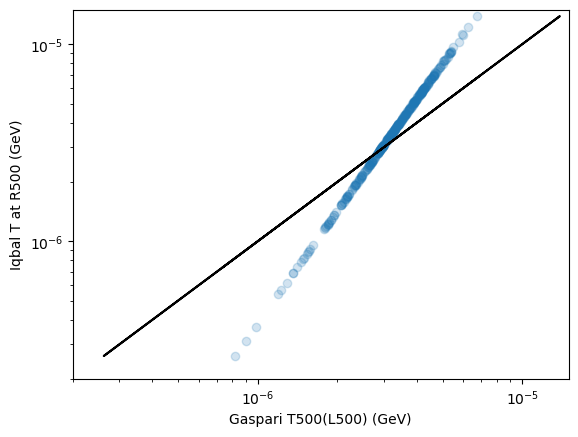

In [38]:
plt.scatter(gaspari, iqbal, alpha=0.2)
#plt.plot(gaspari, gaspari, color="black")
plt.plot(iqbal, iqbal, color="black")
plt.xlim(2*1e-7, 1.5*1e-5)
plt.ylim(2*1e-7, 1.5*1e-5)

plt.ylabel("Iqbal T at R500 (GeV)")
plt.xlabel("Gaspari T500(L500) (GeV)")

plt.xscale('log')
plt.yscale('log')

Text(0.5, 0, 'Gaspari T500(L500) (GeV)')

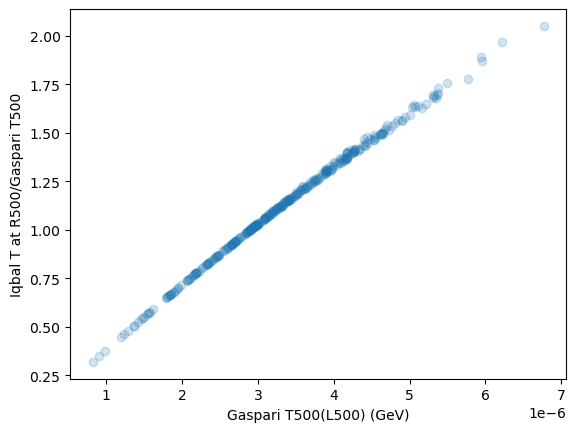

In [44]:
plt.scatter(gaspari, np.divide(iqbal,gaspari), alpha=0.2)
#plt.plot(gaspari, gaspari, color="black")
#plt.plot(gaspari, iqbal, color="black")
#plt.xlim(2*1e-7, 1.5*1e-5)
#plt.ylim(2*1e-7, 1.5*1e-5)

plt.ylabel("Iqbal T at R500/Gaspari T500")
plt.xlabel("Gaspari T500(L500) (GeV)")

#plt.xscale('log')
#plt.yscale('log')